In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
df = pd.read_csv('titanic.csv')
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [89]:
#check number of null in each column
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [90]:
#way-1 at Age column to remove nall by mean value:
#df.Age = df.Age.fillna(df.Age.mean())

#way-2:
df.Age.replace(np.nan , df.Age.mean() , inplace = True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [91]:
#Check occurancess of each catagory , and replace with most frequent
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [92]:
#most frequent:
df.Embarked.value_counts().idxmax()

'S'

In [93]:
#replace:  w/ most freq.
#df['Embarked'].replace(np.nan , 'S' , inplace = True)
df.Embarked = df.Embarked.fillna('S')
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [94]:
df.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [95]:
#mode, way -1
w1 = df.Cabin.value_counts().idxmax()

# mode, way -2
w2 = df['Cabin'].mode().iloc[0]
print(w1)
print(w2)

B96 B98
B96 B98


In [96]:
#df['Cabin'].replace(np.nan , w1 = df.Cabin.value_counts().idxmax() , inplace = True )
df['Cabin'] = df['Cabin'].fillna( df['Cabin'].mode().iloc[0] )
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [97]:
#Numeric Data:
df_n = df.select_dtypes(exclude='object')
print(df_n)
#Catagoric Data:
df_c = df.select_dtypes(include = 'object')
print(df_c)

     PassengerId  Survived  Pclass        Age  SibSp  Parch     Fare
0              1         0       3  22.000000      1      0   7.2500
1              2         1       1  38.000000      1      0  71.2833
2              3         1       3  26.000000      0      0   7.9250
3              4         1       1  35.000000      1      0  53.1000
4              5         0       3  35.000000      0      0   8.0500
..           ...       ...     ...        ...    ...    ...      ...
886          887         0       2  27.000000      0      0  13.0000
887          888         1       1  19.000000      0      0  30.0000
888          889         0       3  29.699118      1      2  23.4500
889          890         1       1  26.000000      0      0  30.0000
890          891         0       3  32.000000      0      0   7.7500

[891 rows x 7 columns]
                                                  Name     Sex  \
0                              Braund, Mr. Owen Harris    male   
1    Cumings, Mr

In [98]:
df.drop(['Name' , 'Ticket'] , axis = 1 , inplace = True )

In [99]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,B96 B98,S
1,2,1,1,female,38.000000,1,0,71.2833,C85,C
2,3,1,3,female,26.000000,0,0,7.9250,B96 B98,S
3,4,1,1,female,35.000000,1,0,53.1000,C123,S
4,5,0,3,male,35.000000,0,0,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,B96 B98,S
887,888,1,1,female,19.000000,0,0,30.0000,B42,S
888,889,0,3,female,29.699118,1,2,23.4500,B96 B98,S
889,890,1,1,male,26.000000,0,0,30.0000,C148,C


<Axes: >

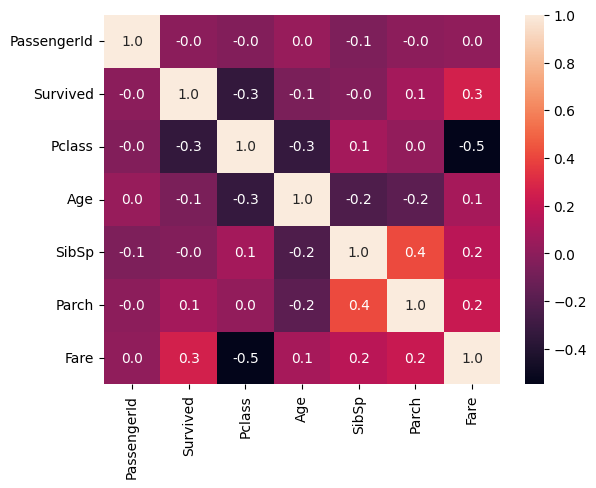

In [100]:
sns.heatmap(df_n.corr() , annot = True , fmt = '.1f')

In [101]:
df.drop(['PassengerId' , 'SibSp'] , axis = 1 , inplace = True)
df

,Survived,Pclass,Sex,Age,Parch,Fare,Cabin,Embarked
0,0,3,male,22.000000,0,7.2500,B96 B98,S
1,1,1,female,38.000000,0,71.2833,C85,C
2,1,3,female,26.000000,0,7.9250,B96 B98,S
3,1,1,female,35.000000,0,53.1000,C123,S
4,0,3,male,35.000000,0,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,13.0000,B96 B98,S
887,1,1,female,19.000000,0,30.0000,B42,S
888,0,3,female,29.699118,2,23.4500,B96 B98,S
889,1,1,male,26.000000,0,30.0000,C148,C


We can remove PassengerId , SibSp; Now , check relation between survived and cabin

<Axes: xlabel='Cabin'>

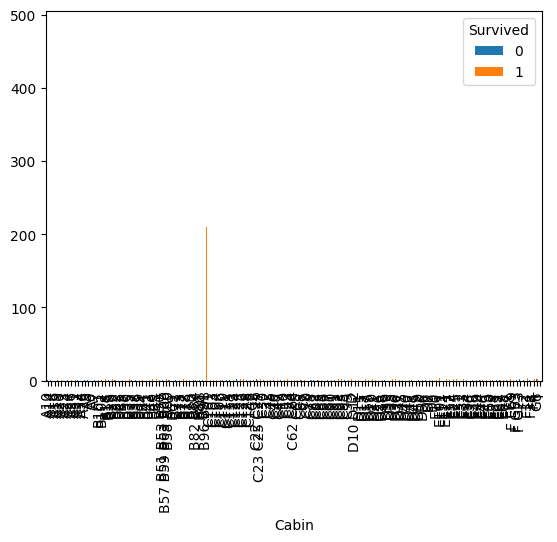

In [102]:
pd.crosstab(df.Cabin , df.Survived).plot(kind = 'bar')

<Axes: xlabel='Embarked'>

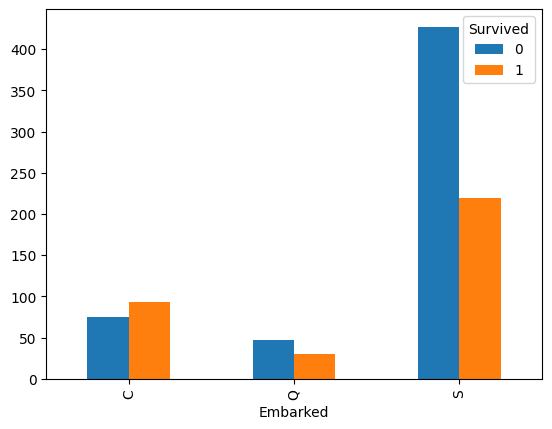

In [103]:
pd.crosstab(df.Embarked , df.Survived).plot(kind = 'bar')

In [104]:
#drop  cabin:
df.drop('Cabin' , axis = 1  , inplace = True)
df

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,3,male,22.000000,0,7.2500,S
1,1,1,female,38.000000,0,71.2833,C
2,1,3,female,26.000000,0,7.9250,S
3,1,1,female,35.000000,0,53.1000,S
4,0,3,male,35.000000,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,13.0000,S
887,1,1,female,19.000000,0,30.0000,S
888,0,3,female,29.699118,2,23.4500,S
889,1,1,male,26.000000,0,30.0000,C


In [105]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Sex = le.fit_transform(df['Sex'])
df
# male = 1 , female = 0

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,3,1,22.000000,0,7.2500,S
1,1,1,0,38.000000,0,71.2833,C
2,1,3,0,26.000000,0,7.9250,S
3,1,1,0,35.000000,0,53.1000,S
4,0,3,1,35.000000,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,13.0000,S
887,1,1,0,19.000000,0,30.0000,S
888,0,3,0,29.699118,2,23.4500,S
889,1,1,1,26.000000,0,30.0000,C


In [106]:
#checking no. of unique catagories of each column
#df.apply(lambda col: col.nunique())

#checking unique catagories od each column
#df.apply(lambda col: col.unique())

le_Em = LabelEncoder()
df.Embarked = le_Em.fit_transform(df['Embarked'])
df
# S =2, C = 0, Q = 1


,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,3,1,22.000000,0,7.2500,2
1,1,1,0,38.000000,0,71.2833,0
2,1,3,0,26.000000,0,7.9250,2
3,1,1,0,35.000000,0,53.1000,2
4,0,3,1,35.000000,0,8.0500,2
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,13.0000,2
887,1,1,0,19.000000,0,30.0000,2
888,0,3,0,29.699118,2,23.4500,2
889,1,1,1,26.000000,0,30.0000,0


In [107]:
df.drop(['Parch','Embarked'], axis =1 , inplace = True)
#It is checked that w/ this two class have a less accurecy(76%),
#maybe it because we do not apply feature engineering

df

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.000000,7.2500
1,1,1,0,38.000000,71.2833
2,1,3,0,26.000000,7.9250
3,1,1,0,35.000000,53.1000
4,0,3,1,35.000000,8.0500
...,...,...,...,...,...
886,0,2,1,27.000000,13.0000
887,1,1,0,19.000000,30.0000
888,0,3,0,29.699118,23.4500
889,1,1,1,26.000000,30.0000


In [108]:
#I left feature engineering on dataset, Now, splitting
#X1 = df.drop('Survived' , axis = 1)
X = df.iloc[: , 1:7]
#y1 = df.Survived
y = df.iloc[:,0]

from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X , y , test_size = .2 , random_state = 7)

In [109]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train , y_train)

DecisionTreeClassifier()

In [110]:
model.score(X_test , y_test)

0.7932960893854749